In [3]:
#Brendon McHugh PHY408 Lab 0
#1.1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

a = 1 + 5
b = 2
c = a + b
print(a / b)
print(a // b)
print(a - b)
print(a * b)
print(a**b)

3.0
3
4
12
36


In [4]:
a = np.array([[3, 1],
[1, 3]])
b = np.array([[3],
[5]])
print(a * b)
print(np.dot(a, b))
print(np.dot(b.T, a))
c = a**(-1.0)

[[ 9  3]
 [ 5 15]]
[[14]
 [18]]
[[14 18]]


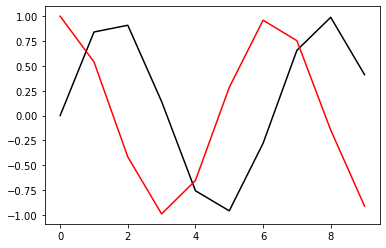

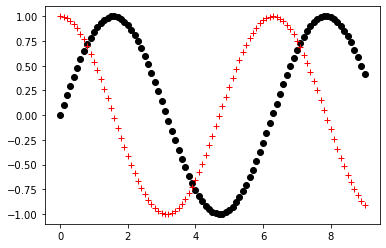

In [8]:
t = np.arange(10)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'k', t, h, 'r');
t = np.arange(0, 9.1, 0.1)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'ok', t, h, '+r');

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[1.00230524e+00 1.78186583e+01 3.16774344e+02 5.63151182e+03
 1.00115196e+05 1.77981556e+06 3.16409854e+07 5.62503203e+08
 1.00000000e+10]
[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01]


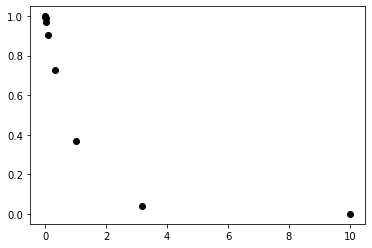

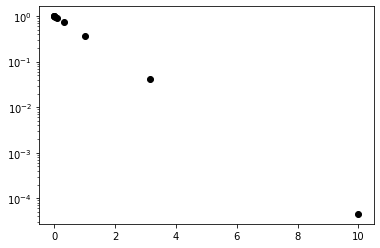

In [9]:
t = np.linspace(0, 10, 20)
print(t)
t = np.logspace(0.001, 10, 9)
print(t)
t = np.logspace(-3, 1, 9)
print(t)
y = np.exp(-t)
plt.figure()
plt.plot(t, y, 'ok')
plt.figure()
plt.semilogy(t, y, 'ok') #Make a plot with log scaling on the y axis.

In [11]:
#1.2 Integration Function
def integral(y, dx):
# function c = integral(y, dx)
# To numerically calculate integral of vector y with interval dx:
# c = integral[ y(x) dx]
# ------ This is a demonstration program ------
    n = len(y) # Get the length of vector y
    nx = len(dx) if np.iterable(dx) else 1
    c = 0 # initialize c because we are going to use it
    # dx is a scalar <=> x is equally spaced
    if nx == 1: # ==, equal to, as a condition
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx / 2
# x is not equally spaced, then length of dx has to be n-1
    elif nx == n-1:
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx[k-1] / 2
# If nx is not 1 or n-1, display an error messege and terminate program
    else:
        print('Lengths of y and dx do not match!')
    return c

0.999979020750832


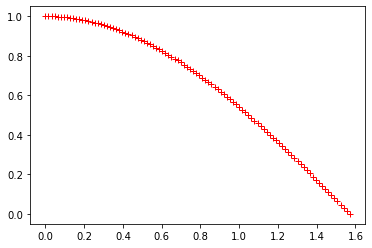

In [12]:
# number of samples
nt = 100
# generate time vector
t = np.linspace(0, 0.5*np.pi, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.cos(t)
plt.plot(t, y, 'r+')
c = integral(y, dt)
print(c)

(1.2.1) Part 1: First plot y(t). Is the output c value what you are expecting for ∫ cos(t)dt from 0 to pi/2? How can you improve the accuracy of your computation?


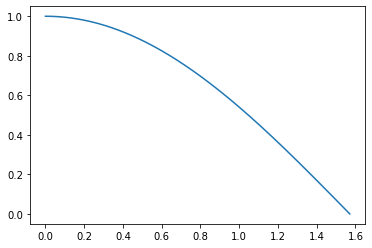

In [24]:
#plot of y(t)=cos(t)
t=np.linspace(0,np.pi/2, 1000)
y=np.cos(t)
plt.figure()
plt.plot(t, y)
plt.show()

The output value of c is not exactly what I'd expect, since the exact answer is actually. Of course the reason for this is that we are only approximating the integral using nt=100 samples. To improve the accuracy, we could use a higher number of samples. The code below demonstrates this increased accuracy using nt=100000:

In [26]:
# number of samples
nt = 100000
# generate time vector
t = np.linspace(0, 0.5*np.pi, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.cos(t)
c = integral(y, dt)
print(c)

0.9999999999794388


(1.2.2) Part 2: For an unevenly spaced time series that depicts sin
[2π(t + 2 ∗ t2)](so-called chirp function), compute∫ sin[2π(t + 2 ∗ t2)]dt from 0 to 1. (saved as uneven.py).Show your plot of y(t) (for nt = 50). Try different nt values and see how the integral results change. Write a for loop around the statements above to try a series of nt values (e.g, 20, 50, 100,
500, 1000, 2000) and generate a plot of c(nt). What value does c converge to after using larger and larger nt? (Please include your modified Python code.)

In [ ]:
for i in [20,50,100,500,1000,2000,10000]:
    nt = i
# sampling between [0,0.5]
    t1 = np.linspace(0, 0.5, nt)
# double sampling between [0.5,1]
    t2 = np.linspace(0.5, 1, 2*nt)
# concatenate time vector
    t = np.concatenate((t1[:-1], t2))
# compute y values
    y = np.sin(2 * np.pi * (t + 2 * t**2))
    plt.plot(t, y)
# compute sampling interval vector
    dt = t[1:] - t[:-1]
    c = integral(y, dt)
    print(c)